In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [2]:
bos['MEDV'] = boston.target

In [3]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
bos.describe().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,4.0,11.0,11.0,0.0,1.0,6.0,69.0,4.0,10.0,408.0,18.0,357.0,13.0,23.0
std,9.0,23.0,7.0,0.0,0.0,1.0,28.0,2.0,9.0,169.0,2.0,91.0,7.0,9.0
min,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,187.0,13.0,0.0,2.0,5.0
25%,0.0,0.0,5.0,0.0,0.0,6.0,45.0,2.0,4.0,279.0,17.0,375.0,7.0,17.0
50%,0.0,0.0,10.0,0.0,1.0,6.0,78.0,3.0,5.0,330.0,19.0,391.0,11.0,21.0
75%,4.0,12.0,18.0,0.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,396.0,17.0,25.0
max,89.0,100.0,28.0,1.0,1.0,9.0,100.0,12.0,24.0,711.0,22.0,397.0,38.0,50.0


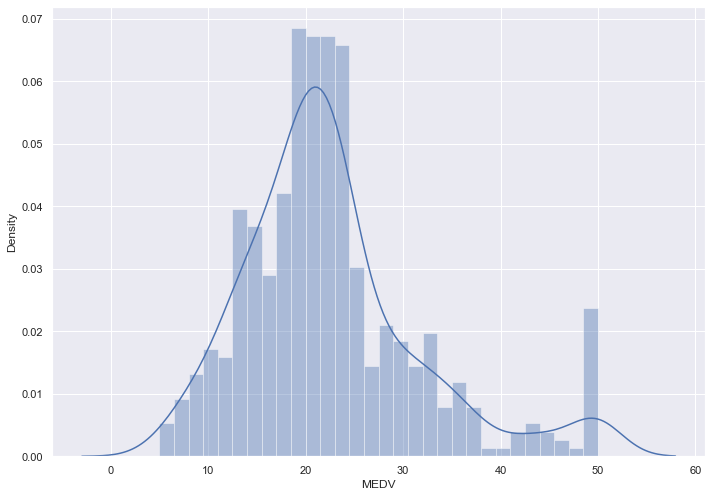

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

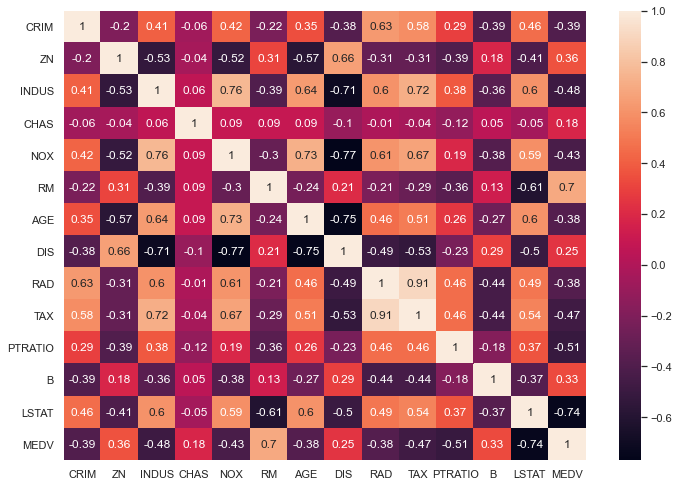

In [6]:
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

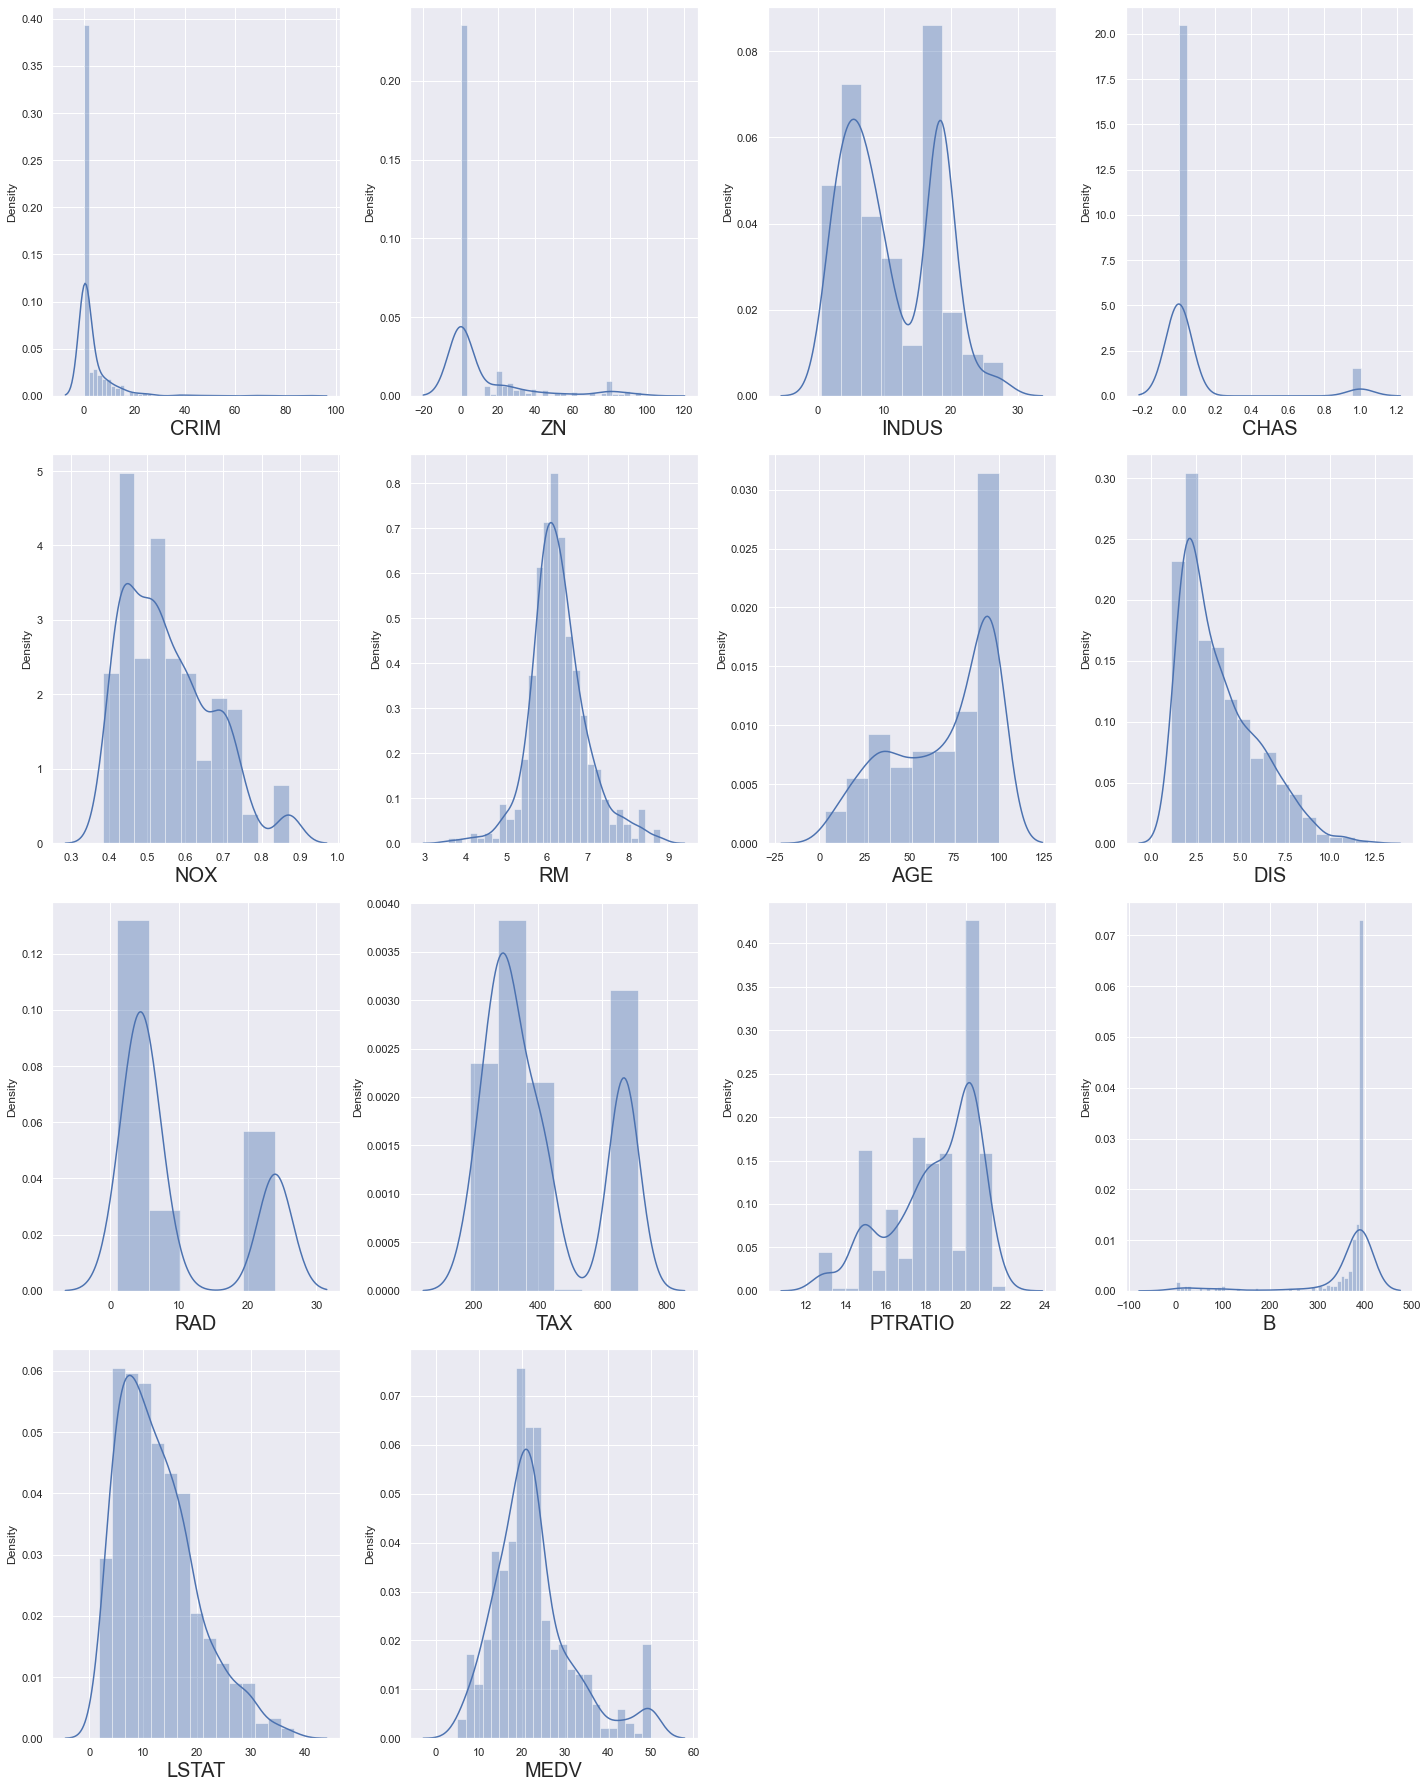

In [7]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=len(bos.columns) :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

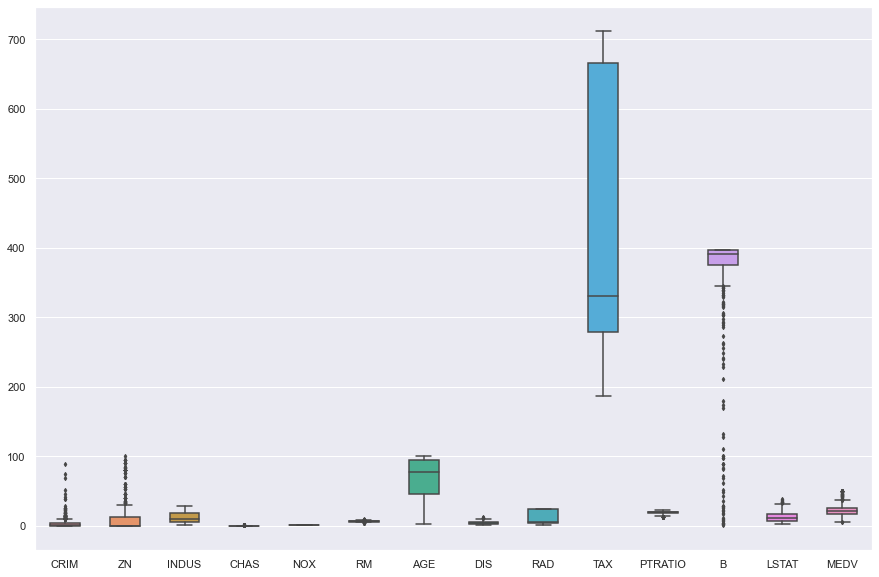

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)


In [9]:
IQR = bos.CRIM.quantile(.75) - bos.CRIM.quantile(.25)
lower_bound = bos.CRIM.quantile(.25) - (IQR * 1.5)
upper_bound = bos.CRIM.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(bos.CRIM.mean())

-5.31051125
9.06963875
3.6135235573122535


(None, None, None)

In [10]:
bos.loc[bos['CRIM']>=9,'CRIM']=9

<AxesSubplot:xlabel='CRIM'>

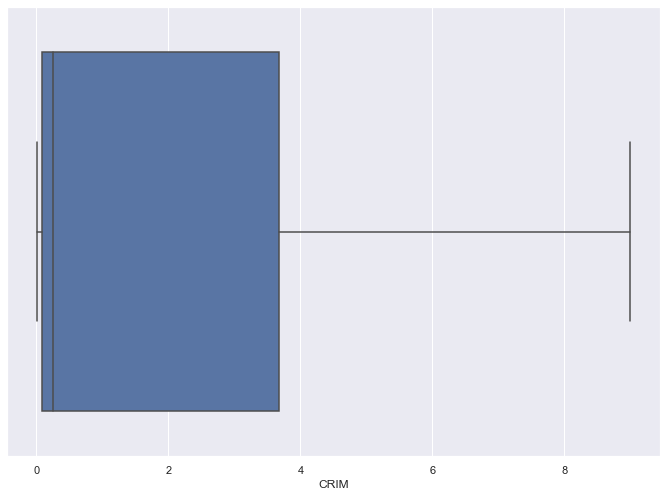

In [11]:
sns.boxplot(bos.CRIM)

In [12]:
IQR = bos.ZN.quantile(.75) - bos.ZN.quantile(.25)
lower_bound = bos.ZN.quantile(.25) - (IQR * 1.5)
upper_bound = bos.ZN.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(bos.ZN.mean())

-18.75
31.25
11.363636363636363


(None, None, None)

In [13]:
bos.loc[bos['ZN']>=31,'ZN']=31

<AxesSubplot:xlabel='ZN'>

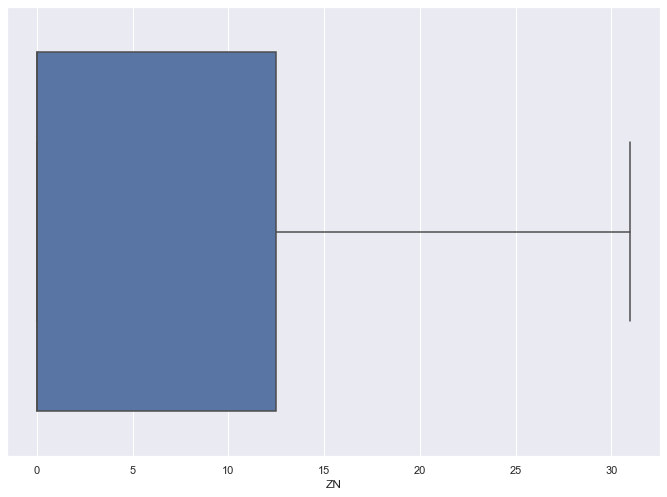

In [14]:
sns.boxplot(bos.ZN)

In [15]:
IQR = bos.B.quantile(.75) - bos.B.quantile(.25)
lower_bound = bos.B.quantile(.25) - (IQR * 1.5)
upper_bound = bos.B.quantile(.75) + (IQR * 1.5)
print(lower_bound) , print(upper_bound), print(bos.B.mean())

344.10624999999993
427.49625000000003
356.67403162055257


(None, None, None)

In [16]:
bos.loc[(bos['B']<=343) | (bos['B']>=426),'B']=343

<AxesSubplot:xlabel='B'>

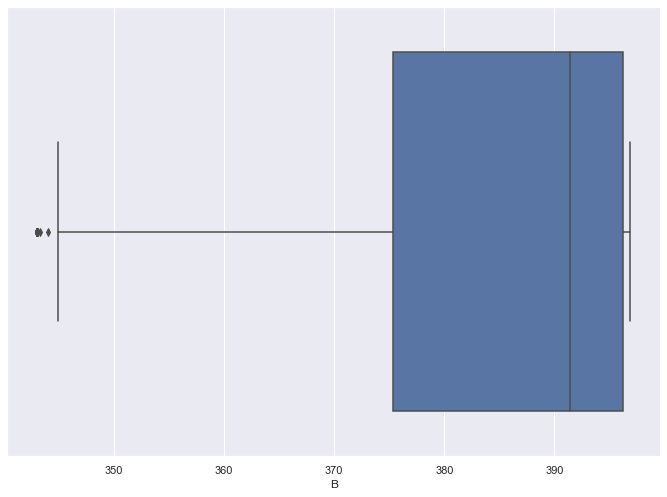

In [17]:
sns.boxplot(bos.B)

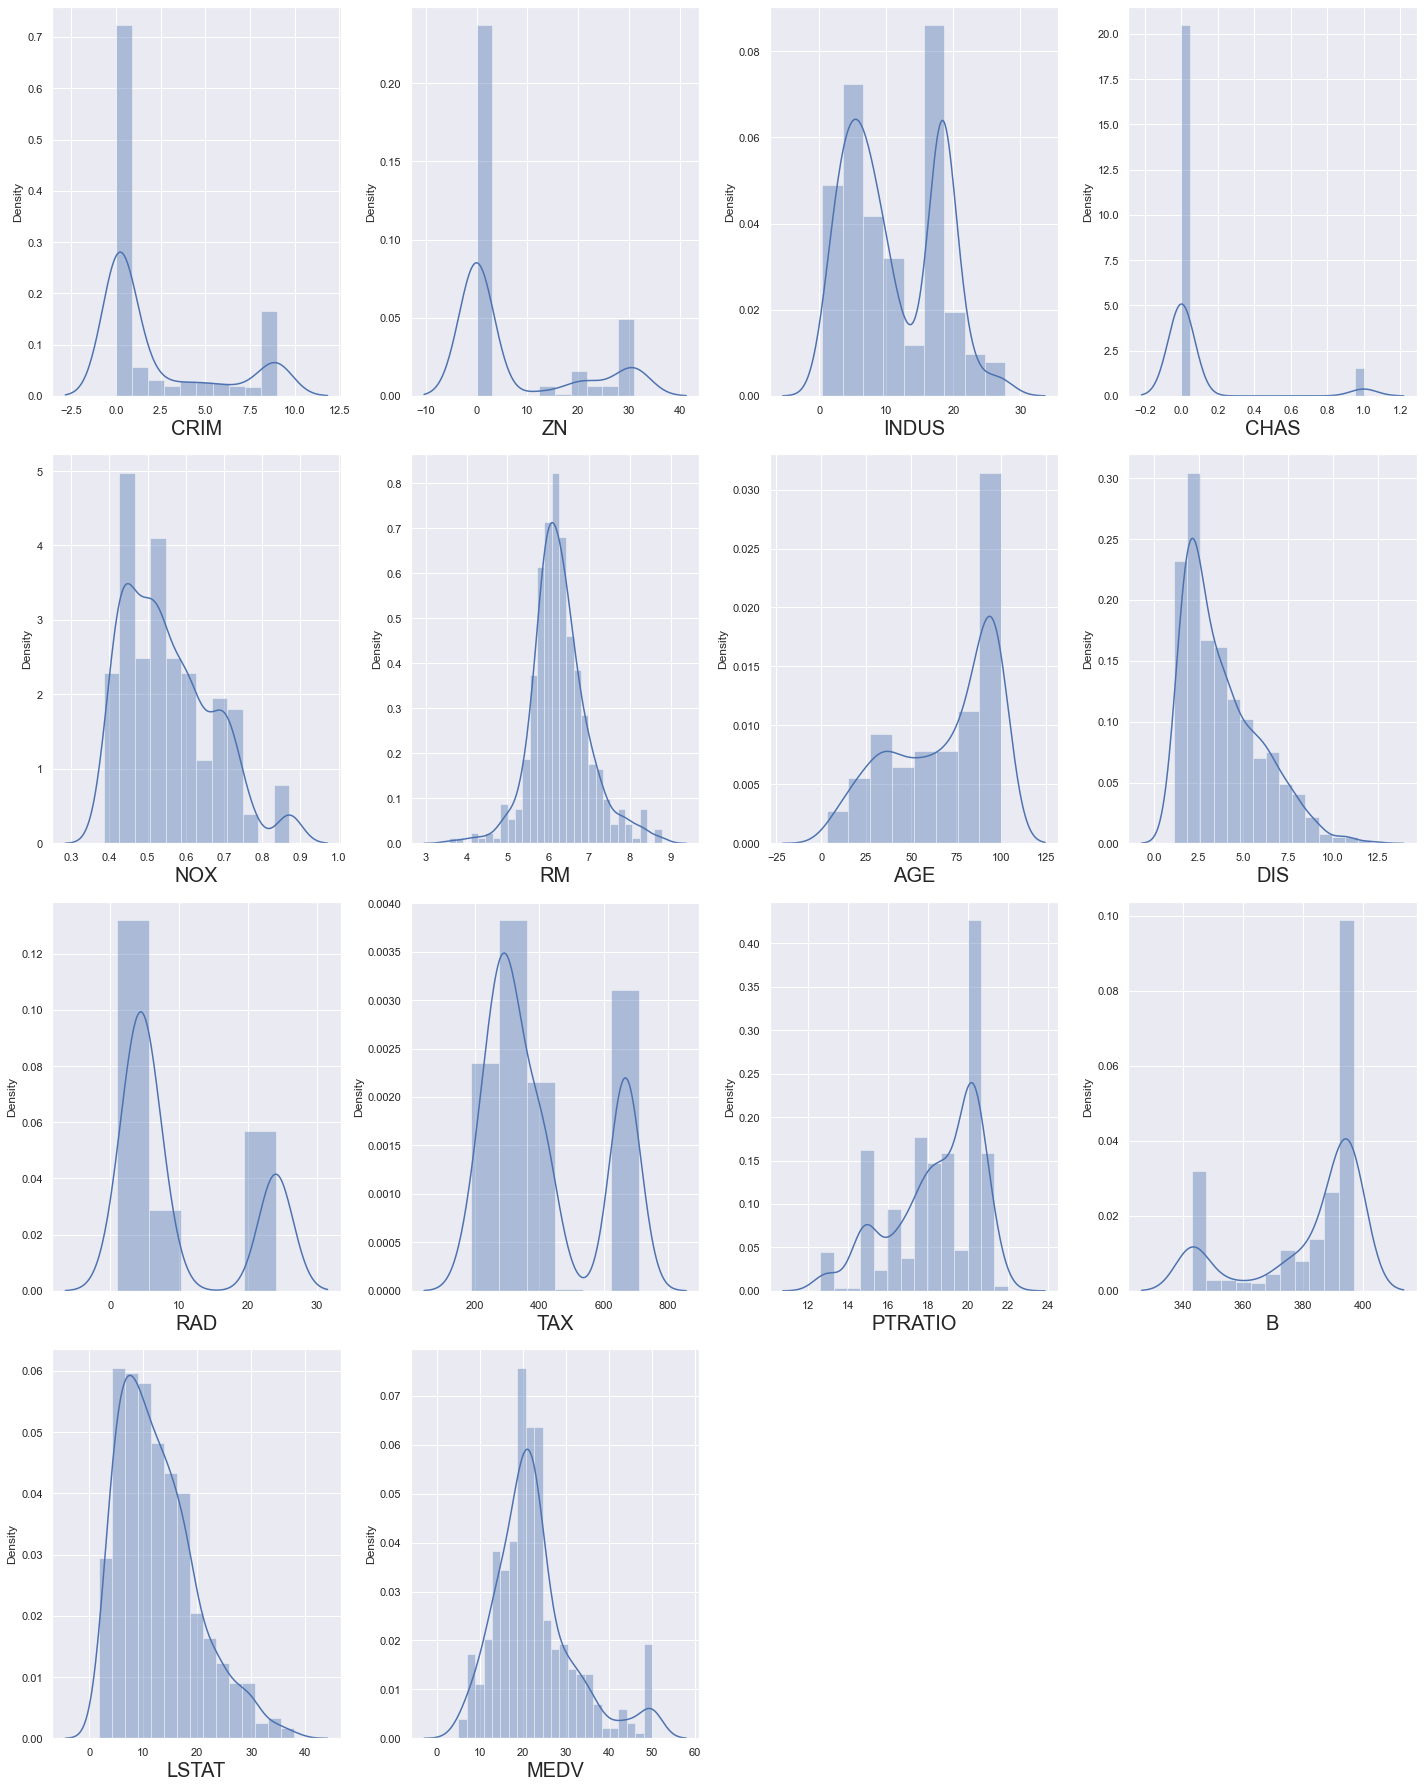

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=len(bos.columns) :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

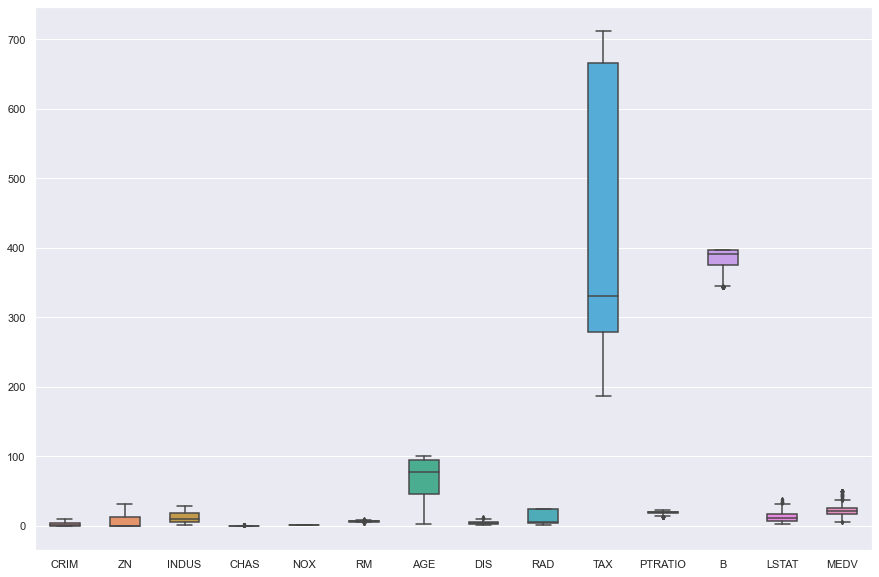

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)


In [20]:
X = bos.drop(['MEDV'],axis=1)
y = bos['MEDV']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [22]:
#X_scaled =pd.DataFrame(X_scaled, columns = X.columns)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [24]:
vif.sort_values('VIF',ascending=False)

,VIF,Features
8,12.710028,RAD
0,9.484989,CRIM
9,8.684486,TAX
4,4.421627,NOX
2,4.012150,INDUS
7,3.952831,DIS
6,3.071272,AGE
12,3.069510,LSTAT
1,2.424945,ZN
5,1.904920,RM


In [25]:
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [26]:
X_scaled.drop(['RAD','CRIM','TAX'],inplace=True,axis=1)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state=42)

In [28]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
regression.score(x_train,y_train)

0.7282620699499167

In [31]:
regression.score(x_test,y_test)

0.6487761781741319

In [32]:
regression.coef_

array([ 0.14242292, -0.12245103,  0.89051804, -1.97902687,  3.13716299,
       -0.18840689, -2.69100988, -2.02427976,  0.47310937, -3.88463395])

In [33]:
y_pred = regression.predict(x_test)

In [34]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='MEDV ~ ZN + INDUS + CHAS + NOX+AGE+DIS+PTRATIO+B+PTRATIO', data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     54.09
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           6.81e-63
Time:                        14:09:42   Log-Likelihood:                -1681.8
No. Observations:                 506   AIC:                             3382.
Df Residuals:                     497   BIC:                             3420.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.1560      8.534      7.987      0.000      51.390      84.922
ZN             0.0839      0.038      2.230      0.026       0.010       0.158
INDUS         -0.2932      0.078     -3.776      0.000      -0.446      -0.141
CHAS           5.5111      1.209      4.557      0.000       3.135       7.887
NOX          -28.7228      5.058     -5.678      0.000     -38.661     -18.784
AGE           -0.0494      0.018     -2.803      0.005      -0.084      -0.015
DIS           -1.9894      0.278     -7.166      0.000      -2.535      -1.444
PTRATIO       -1.4867      0.166     -8.964      0.000      -1.813      -1.161
B              0.0288      0.018      1.643      0.101      -0.006       0.063
==============================================================================
Omnibus:                      167.112   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              516.330
Skew:                           1.565   Prob(JB):                    7.59e-113
Kurtosis:                       6.834   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mae

3.2961394773496875

In [36]:
np.mean(y_test)

21.488235294117654

In [37]:
np.mean(y_pred)

21.11788168095056

In [38]:
r2_score(y_test,y_pred)

0.6487761781741319

In [41]:
import pickle
# saving the model to the local file system
filename = 'Boston_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [42]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[2.014390,-0.689681,-3.668398,-0.930305,0.674384,-1.268620,0.134319,-0.395567,0.782119,-1.278814]])
a

array([29.5355274])